# chapter 7: 딥러닝을 시작합니다

## 07 - 1 인공 신경망

럭키백 이벤트가 끝나고 열린 주주총회에서 패션 분야로의 진출이 결정되었음. 이 소식을 접한 마케팅 팀은 패션 분야 오픈 이벤트도 역시 럭키백 이벤트 형식으로 진행한다고 합니다.  
특히 마케팅 팀은 패션 상품의 주 고객층인 20대를 타깃으로 이전보다 럭키백의 정확도를 높여야 함. 홍 선배는 생선 럭키백에서 사용한 로지스틱 회귀 알고리즘으로 패션 럭키백의 정확도를 높이려고 하였음.

### 패션 MNIST
판매할 패션 상품의 데이터는 아직 없지만, 마침 한빛 마켓에서 상품과 똑같은 데이터를 구할 수 있었음.  
7장과 8장에서는 __패션 MNIST 데이터셋__ 을 사용하겠음. 이 데이터셋은 10종류의 패션 아이템으로 구성되어 있음.  
##### 여기서 잠깐! MNIST가 뭐죠?  
머신러닝과 딥러닝을 처음 배울 때 많이 사용하는 데이터셋. 이 데이터는 손으로 쓴 0 ~ 9까지의 숫자로 이루어진 데이터.  

패션 MNIST 데이터는 워낙 유명하기 때문에 많은 딥러닝 라이브러리에서 이 데이터를 가져올 수 있는 도구를 제공함. 여기서는 __텐서플로__ 를 사용해 이 데이터를 불러오겠음.  
딥러닝이나 텐서플로에 대해 설명하기 전에 먼저 패션 MNIST가 어떤 데이터인지 확인해보겠음.  
편리하게도 텐서플로도 코랩에서 바로 사용할 수 있음. 다음 명령으로 텐서플로의 __케라스__ 패키지를 임포트하고 패션 MNIST 데이터를 다운로드.

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


keras.datasets.fashion_mnist 모듈 아래 load_data() 함수는 친절하게 훈련 데이터와 테스트 데이터를 나누어 반환. 이 데이터는 각각 입력과 타깃의 쌍으로 구성되어 있음.  
내려받은 데이터가 있는지 확인하려면 왼쪽의 폴더 아이콘을 클릭해서 sample_data 폴더를 확인.  
전달받은 데이터의 크기를 확인해보겠음.

In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


훈련 데이터는 60,000개의 이미지로 이루어져있음. 각 이미지는 28 x 28 크기. 타깃도 60,000개의 원소가 있는 1차원 배열.

In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


테스트 세트는 10,000 개의 이미지로 이루어져 있음.  
6장에서 맷플롯립 라이브러리로 과일을 출력했던 것처럼 훈련 데이터에서 몇 개의 샘플을 그림으로 출력.  
어떤 이미지인지 직접 보는 것이 문제를 이해하는 데 큰 도움이 됨.

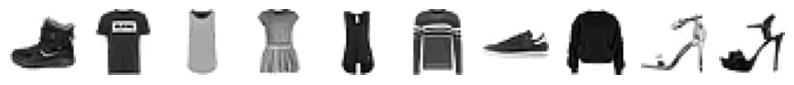

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

크기가 28 x 28이다 보니 꽤 작고 흐릿함. 신발과 다양한 종류의 옷들이 보임. 이 샘플들의 타깃값을 확인.  
파이썬의 리스트 내포를 사용해서 처음 10개 샘플의 타깃값을 리스트로 만든 후 출력하겠음.

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


패션 MNIST의 타깃은 0 ~ 9까지의 숫자 레이블로 구성됨. 각 숫자의 의미는 아직 잘 모르지만 마지막 2개의 샘플이 같은 레이블(숫자 5)를 가지고 있음.  
앞서 출력한 이미지를 보더라도 이 2개의 샘플은 같은 종류의 신발 같음.  
마지막으로 넘파이 unique() 함수로 레이블 당 샘플 개수를 확인해 보겠음.

In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


0 ~ 9까지 레이블마다 정확히 6,000개의 샘플이 들어 있는 것을 볼 수 있음.  
이 과정을 통해 패션 MNIST 데이터셋을 저장했고, 어떤 종류의 이미지로 이루어져 있는지 감을 잡았기를 바람.

### 로지스틱 회귀로 패션 아이템 분류하기
이 훈련 샘플은 60,000개나 되기 때문에 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 샘플을 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적으로 보임.  
이런 상황에 잘 맞는 방법이 확률적 경사 하강법임.  
4장에서 SDGClassifier 클래스의 loss 매개변수를 'log'로 지정하여 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법 모델을 만들었음. 홍 선배가 바로 이 방법을 패션 럭키백에 사용하고 있었음. SGDClassifier를 사용할 때 표준화 전처리된 데이터를 사용했음. 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동합니다. 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려올 수 없음. 패션 MNIST의 경우 픽셀은 0 ~ 255 사이의 정숫값을 가짐. 이런 이미지의 경우 보통 255로 나누어 0 ~ 1 사이의 값으로 정규화 함.  
이는 표준화는 아니지만 양수 값으로 이루어진 이미지를 전처리할 때 널리 사용하는 방법.  
6장에서 했듯이 reshape() 메서드를 사용해 2차원 배열인 각 샘플을 1차원 배열로 펼치겠음.  
SGDClassifier는 2차원 입력을 다루지 못하기 때문에 각 샘플을 1차원 배열로 만들어야 함.

In [8]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

reshape() 메서드의 두 번째 매개변수를 28 x 28 이미지 크기에 맞게 지정하면 첫 번째 차원 (샘플 개수)은 변하지 않고 원본 데이터의 두 번째, 세 번째 차원이 1차원으로 합쳐짐.  
변환된 train_scaled의 크기를 확인.

In [9]:
print(train_scaled.shape)

(60000, 784)


SGDClassifier 클래스와 cross_validate 함수를 사용해 이 데이터에서 교차 검증으로 성능을 확인.

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_l

0.8197166666666666


여기에서는 SGDClassifier의 반복 횟수(max_iter)를 5번으로 지정했음. 반복 횟수를 늘려도 성능이 크게 향상되지는 않았음.  
여기에서 잠시 4장에서 배웠던 로지스틱 회귀 공식을 떠올려 보면,  
z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f  
이 식을 패션 MNIST 데이터에 맞게 변형하면 다음과 같음.  
z_티셔츠 = w1 * (픽셀 1) + w2 * (픽셀 2) + ... + w784 * (픽셀784) + b

총 784개의 픽셀, 즉 특성이 있으므로 아주 긴 식이 만들어짐. 가중치 개수도 많아지기 때문에 abc 대신에 w1, w2, w3과 같은 식으로 바꾸었음. 마지막에 절편 b를 더함.  
두 번째 레이블인 바지에 대한 방정식 역시 위와 유사한 형태.
z_바지 = w1' * (픽셀 1) + w2' * (픽셀 2) + ... + w784' * (픽셀784) + b'  
이런 식으로 나머지 클래스에 대한 선형 방정식을 모두 생각해 볼 수 있음. SGDClassifier 모델은 패션 MNIST 데이터의 클래스를 가능한 잘 구분할 수 있도록 10개의 방정식에 대한 모델 파라미터 (가중치와 절편)를 찾음.  
z_티셔츠, z_바지와 같이 10개의 클래스에 대한 선형 방정식을 모두 계산한 다음에는 4장에서 보았듯이 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음.

### 인공 신경망
혼공머신은 한빛 마켓에 들어오기 전에 딥러닝 스터디 그룹에 참여하여 인공 신경망에 대해 공부하였음. 이미지 분류 문제에는 인공 신경망이 잘 맞는다는 것을 기억하고 있었음.  
가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같음. 먼저 패션 아이템 분류 문제를 인공 신경망으로 표현해보겠음.  
클래스가 총 10개 인 z_10까지 계산한 데이터를 바탕으로 z_1 ~ z_10을 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미에서 __출력층__ 이라고 부름.  
인공 신경망에서는 z값을 계산하는 단위를 __뉴련__ 이라고 부름. 하지만 뉴련에서 일어나는 일은 선형 계산이 전부. 이제 뉴련이란 표현 대신에 __유닛__ 이라고 부르는 사람이 더 많아짐.  
그 다음 픽셀 1, 픽셀 2를 x1, x2와 같이 바꾸었음. 역시 아래첨자를 사용해 784번째 픽셀에 해당하는 x_784까지 나타냈음. 인공 신경망은 x_1 ~ x_784까지를 __입력층__ 이라고 부름.  
즉 입력층은 픽셀값 자체이고 특별한 계산을 수행하지 않음. 하지만 많은 사람이 입력층이라 부르기 때문에 여기에서도 관례를 따르겠음.

z_1을 만들기 위해 픽셀1인 x_1에 곱해지는 가중치는 w_1.1이라고 스고 z_2를 만들기 위해 픽셀 1인 x_1에 곱해지는 가중치는 w_1.2라고 씀. 절편은 뉴런마다 하나씩이므로 순서대로 b_1, b_2와 같이 나타내었음. 1장에서 소개했듯이 인공 신경망은 1943년 __워런 매컬러__ 와 __월터 피츠__ 가 제안한 뉴런 모델로 거슬로 올라감. 이를 __매컬러-피츠 뉴런__ 이라고 부름.  
가장 인기가 높은 딥러닝 라이브러리인 텐서플로를 사용해 인공 신경망 모델을 만들어 보겠음.

#### 텐서플로와 케라스
__텐서플로__ 는 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리. 이때를 기점으로 딥러닝에 대한 개발자의 관심이 많이 늘어났고, 2016년 3월 __알파고__ 가 이세돌 9단을 이겨 대중에 알려지면서 폭발적으로 인기가 높아짐. 텐서플로는 그 후 많은 발전을 거듭하면서 2019년 9월 2.0 버전이 릴리스 되었음. 이 책에서는 텐서플로의 2.x 최신 버전을 사용함.  


In [11]:
import tensorflow as tf

텐서플로에는 저수준 API와 고수준 API가 있음. 바로 __테라스__ 가 텐서플로의 고수준 API.  
케라스는 2015년 3월 __프랑소와 숄레__ 가 만든 딥러닝 라이브러리.  
딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점 중 하나는 그래픽 처리 장치인 CPU를 사용하여 인공 신경망을 훈련한다는 것.  
GPU는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 도움이 됨.

케라스 라이브러리는 직접 GPU 연산을 수행하지 않음. 대신 GPU 연산을 수행하는 다른 라이브러리를 __백엔드__ 로 사용함.  
프랑소와가 구글에 합류한 뒤 텐서플로 라이브러리에 케라스 API가 내장되었음. 텐서플로 2.0부터는 케라스 API를 남기고 나머지 고수준 API를 모두 정리.

In [12]:
from tensorflow import keras

### 인공 신경망으로 모델 만들기
여기에서는 앞서 로지스틱 회귀에서 만든 훈련 데이터 train_scaled와 train_target을 사용하겠음.  
로지스틱 회귀에서는 교차 검증을 사용해 모델을 평가했지만, 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용함.  
이렇게 하는 이유는 (1) 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적. (2) 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문.  
어떤 딥러닝 모델은 훈련하는 데 몇 시간, 심지어 며칠이 걸릴 수도 있음. 패션 MNIST 데이터셋이 그만큼 크지는 않지만 관례를 따라 검증 세트를 나누어보겟음.

In [13]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [15]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


양쪽의 뉴런이 모두 연결하고 있기에 __완전 연결층__ 이라고 부름. 그럼 케라스의 Dense 클래스를 사용해 밀집층을 만들어보겠음.  
필요한 매개변수는 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기

In [17]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

첫 번재 매개변수로 뉴런 개수를 10개로 지정함. 10개의 패션 아이템을 분류하기 때문. 10개의 뉴런에서 출력되는 값을 확률로 바꾸기 위해 소프트맥스 함수를 사용하겠음.  
4장에서 다중 분류에 왜 소프트맥스 함수를 사용하는지 자세하게 설명했음. 케라스 층에서는 activaiton 매개변수에 이 함수를 지정함. 만약 2개의 클래스를 분류하는 이진 분류라면 시그모이드 함수를 사용하기 위해 activaion='sigmoid'와 같이 설정. 마지막으로 세 번째 매개변수는 입력값의 크기.  
이제 이 밀집층을 가진 신경망 모델을 만들어야 함. 케라스의 Sequential 클래스를 사용.

In [18]:
model = keras.Sequential(dense)

Sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달했음. 여기서 만든 model 객체가 바로 신경망 모델.  
소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 __활성화 함수__ 라고 부름.  

### 인공 신경망으로 패션 아이템 분류하기
지금까지 사용했던 사이킷런에 비해 케라스에서 모델을 만드는 방식은 조금 다름. 케라스 모델은 훈련하기 전에 설정 단계가 있음. 이런 설정을 model 객체의 compile() 메서드에서 수행함.  
꼭 지정해야 할 것은 손실 함수의 종류. 그 다음 훈련 과정에서 계산하고 싶은 측정값을 지정함.

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

케라스에서는 두 손실 함수를 각각  
- 이진 분류 : loss = 'binart_crossentropy'  
- 다중 분류 : loss = 'categorical_crossentropy'  
패션 MNIST 데이터셋과 같이 다중 분류일 경우에는 이진 분류와 달리 각 클래스에 대한 확률이 모두 출력되기에 타겟에 해당하는 확률만 남겨 놓기 위해서 나머지 확률에는 모두 0을 곱함.  
이와 같이 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것을 __원-핫 인코딩__ 이라고 부름.

In [20]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


텐서플로에서는 정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 그냥 사용 가능. 정수로 된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것이 바로 'sparse_categorical_cross_entropy'. 타깃값을 원 - 핫 인코딩으로 준비했다면 compile() 메서드에 손실함수를 loss='categorical_crossentropy'로 지정.  
케라스는 모델이 훈련할 때 기본으로 에포크마다 손실 값을 출력. 손실이 줄어드는 것을 보고 훈련이 잘되었다는 것을 알 수 있지만, 정확도를 함께 출력하면 더 좋음.  
이를 위해 metrics 매개변수에 정확도 지표를 의미하는 'accuracy'를 지정했음.  
훈련하는 fit() 메서드는 사이킷런과 매우 비슷함. 입력(trian_scaled)과 타깃(train_target)을 지정. 반복할 에포크 횟수를 epochs 매개변수로 지정.

In [21]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 480us/step - loss: 0.6088 - accuracy: 0.7922
Epoch 2/5
1500/1500 [==============================] - 1s 462us/step - loss: 0.4794 - accuracy: 0.8391
Epoch 3/5
1500/1500 [==============================] - 1s 486us/step - loss: 0.4556 - accuracy: 0.8470
Epoch 4/5
1500/1500 [==============================] - 1s 461us/step - loss: 0.4440 - accuracy: 0.8526
Epoch 5/5
1500/1500 [==============================] - 1s 462us/step - loss: 0.4366 - accuracy: 0.8549


케라스는 친절하게 에포크마다 걸린 시간과 손실, 정확도를 출력해줌.  
검증세트(val_scaled, val_target)에서 모델의 성능을 확인해보겠음. 케라스에서 모델의 성능을 평가하는 메서드는 evaluate() 메서드임.

In [22]:
model.evaluate(val_scaled, val_target) 

375/375 [==============================] - 0s 553us/step - loss: 0.4574 - accuracy: 0.8438


[0.4574424922466278, 0.84375]

evaluate() 메서드도 fit() 메서드와 비슷한 출력을 보여줌. 검증 세트의 점수는 훈련 세트 점수보다 좀 더 낮은 것이 일반적. 

## 07 - 2 심층 신경망
1절에서 만들었던 인공 신경망의 성능을 더 높여봅시다.

### 2개의 층
다시 케라스 API를 사용해서 패션 MNIST 데이터셋을 불러오겠습니다.

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

이미지의 픽셀값을 0 ~ 255 범위에서 0 ~ 1 사이로 변환하고 28 x 28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼칩니다.  
train_test_split() 함수로 훈련 세트와 검증 세트로 나눕니다. 

In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

입력층과 출력층 사이에 있는 모든 층을 __은닉층__ 이라고 부름. 활성화 함수는 신경망 층의 선형 방정식의 계산 값에 적용하는 함수.  
이전 절에서 출력층에 적용했던 소프트맥스 함수도 활성화 함수. 출력층에 적용하는 활성화 함수는 종류가 제한되어 있음. 이진 분류일 경우 시그모이드, 다중 분류일 경우 소프트맥스 함수를 사용.  
은닉층의 활성화 함수는 비교적 자유로움

##### 여기서 잠깐! 회귀를 위한 신경망의 출력층에서는 어떤 함수를 사용하나요?
분류 문제는 클래스에 대한 확률을 출력하기 위해 활성화 함수를 사용. 회귀의 출력은 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없음.  
은닉층에 활성화 함수를 적용해야 하는 이유 : 선형계산을 적당하게 비선형적으로 비틀어 주어야 하기에.

시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스로 만들어 보겠음.

In [3]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

dense1이 은닉층이고 100개의 뉴런을 가진 밀집층. 활성화 함수를 'sigmoid'로 지정. input_shape 매개변수에서 입력의 크기를 (784,)로 지정.  
여기서 한 가지 제약 사항은 적어도 출력층의 뉴런보다는 은닉층의 뉴런 개수를 많게 만들어야 함.  
dense2는 출력층.

### 심층 신경망 만들기
dense1과 dense2 객체를 Sequential 클래스에 추가하여 __심층 신경망__ 을 만들어 보겠습니다.

In [4]:
model = keras.Sequential([dense1, dense2])

Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 이와 같이 dense1과 dense2를 리스트로 만들어 전달. 이때 주의할 점은 출력층을 가장 마지막에 두어야 한다는 것.  
인공 신경망의 강력한 성능은 바로 이렇게 층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력에서 나옴.  
케라스는 모델의 summary() 메서드를 호출하면 층에 대한 유용한 정보를 얻을 수 있음.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


맨 첫 줄에 모델의 이름이 나옴. 그 다음 이 모델에 들어 있는 층이 순서대로 나열. 이 순서는 맨 처음 추가한 은닉층에서 출력층의 순서대로 나열.  
층마다 층이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력. 층을 만들 때 name 매개변수로 이름을 지정. 층 이름을 지정하지 않으면 케라스가 자동으로 'dense'라고 이름을 붙임.  
출력 크기를 보면 (None, 100). 첫 번째 차원은 샘플의 개수를 나타냄. 샘플 개수가 아직 정의되어 있지 않기 때문에 None. 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행함. -> 미니배치 경사 하강법.  
케라스의 기본 미니배치 크기는 32개. fit() 메서드에서 batch_size 매개변수로 바꿀 수 있음. 따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정.  
두 번째 100은 은닉층의 뉴런 개수를 100개로 두었으니 100개의 출력이 나오는 것. 즉 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축되었음.  
마지막으로 모델 파라미터 개수가 출력됨. 이 층은 Dense 층이므로 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있음.  
두 번째 층의 출력 크기는 (None, 10). 이때, 층의 파라미터 개수는 100개의 은닉층 뉴런과 10개의 출력층 뉴런이 모두 연결되고, 출력층의 뉴런마다 하나의 절편이 있기 때문에 총 1,010개의 모델 파라미터가 있음. summary() 메서드의 마지막에는 총 모델의 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79,510개로 나옴. 은닉층과 출력층의 파라미터 개수를 합친 값.

### 층을 추가하는 다른 방법
모델을 훈련하기 전에 Seqeuntial 클래스에 층을 추가하는 다른 방법을 알아보겠음. 다음처럼 Seqeuntial 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많음.

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                       name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

이렇게 작업하면 추가되는 층을 한눈에 쉽게 알아보는 장점이 있음. name 매개변수로 모델의 이름을 지정했음. 모델의 이름과 달리 층의 이름은 반드시 영문이여야 함.  
summary() 메서드의 출력에 이름이 잘 반영되는지 확인.

In [7]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이 방법이 편리하지만 아주 많은 층을 추가하려면 Seqeuntial 클래스 생성자가 매우 길어짐. 또 조건에 따라 층을 추가할 수 없음. Seqeuntial 클래스에서 층을 추가할 때 가장 널리 사용하는 방법은 모델의 add() 메서드.

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

여기에서도 Dense 클래스의 객체를 따로 변수에 담지 않고 add() 메서드로 전달. 이 방법을 선택하면 한 눈에 추가되는 층을 볼 수 있고 프로그램 실행 시 동적으로 층을 선택하여 추가할 수 있음.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이제 모델을 훈련. compile() 메서드 설정은 1절에서 했던 것과 동일. 5번의 에포크 동안 훈련.

In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 843us/step - loss: 0.5610 - accuracy: 0.8078
Epoch 2/5
1500/1500 [==============================] - 1s 817us/step - loss: 0.4065 - accuracy: 0.8537
Epoch 3/5
1500/1500 [==============================] - 1s 797us/step - loss: 0.3716 - accuracy: 0.8656
Epoch 4/5
1500/1500 [==============================] - 1s 782us/step - loss: 0.3486 - accuracy: 0.8735
Epoch 5/5
1500/1500 [==============================] - 1s 778us/step - loss: 0.3329 - accuracy: 0.8805


훈련 세트에 대한 성능을 보면 추가된 층이 성능을 향상시켰다는 것을 잘 알 수 있음. 인공 신경망에 몇 개의 층을 추가하더라도 compile() 메서드와 fit() 메서드의 사용법은 동일.

### 렐루 함수
초창기 인공 신경망의 은닉층에 많이 사용된 활성화 함수는 시그모이드 함수.  
이 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못함. 특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만듬.  
이를 개선하기 위해 다른 종류의 활성화 함수가 제안. 바로 __렐루 함수__. 렐루 함수는 아주 간단. 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고, 음수일 경우 0으로 만듬. 렐루 함수는 max(0,z)와 같이 쓸 수 있음. z가 0보다 크면 z를 출력. z가 0보다 작으면 0을 출력. 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있음.  
은닉층의 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에 케라스에서 제공하는 편리한 층 하나를 더 살펴보겠음. 패션 MNIST 데이터는 28 x 28 크기이기 때문에 인공 신경망에 주입하기 위해 넘파이 배열의 reshape() 메서드를 사용해 1차원으로 펼침. 직접 이렇게 1차원으로 펼쳐도 좋지만 케라스에서는 이를 위한 Flatten 층을 제공.  
사실 Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함. 입력에 곱해지는 가중치나 절편이 없음.  
Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 부름.

In [11]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

첫 번째 Dense 층에 있던 input_shape 매개변수를 Flatten 층으로 옮겼음.  
하지만 이 신경망을 깊이가 3인 신경망이라고 부르지 않음. Flatten 클래스는 학습하는 층이 아니기 때문.  
모델의 summary() 메서드를 호출해 보면 이런 점을 더 확실히 알 수 있음. 

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


케라스의 Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있는 것이 장점.  
훈련 데이터를 다시 준비해서 모델을 훈련해보겠음.

In [13]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 814us/step - loss: 0.5259 - accuracy: 0.8155
Epoch 2/5
1500/1500 [==============================] - 1s 790us/step - loss: 0.3915 - accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 1s 796us/step - loss: 0.3537 - accuracy: 0.8743
Epoch 4/5
1500/1500 [==============================] - 1s 800us/step - loss: 0.3333 - accuracy: 0.8811
Epoch 5/5
1500/1500 [==============================] - 1s 789us/step - loss: 0.3181 - accuracy: 0.8874


시그모이드 함수를 사용했을 때와 비교하면 성능이 조금 향상됨. 크지 않지만 렐루 함수의 효과를 보았음. 검증 세트에서도 확인.

In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 514us/step - loss: 0.3668 - accuracy: 0.8715


[0.36684510111808777, 0.8715000152587891]

몇 퍼센트 성능이 향상됨. 인공 신경망의 하이퍼 파라미터에 대해 잠시 알아보고 이번 절을 마무리.

### 옵티마이저
하이퍼 파라미터는 모델이 학습하지 않아 사림이 지정해주어야 하는 파라미터.  
은닉층의 개수, 은닉층의 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈 매개변수, 에포크 매개변수 다 하이퍼 파라미터.  
마지막으로 compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했음. 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공함. 이러한 것을 __옵티마이저__ 라고 부름.  
가장 기본적인 옵티마이저는 확률적 경사 하강법인 SGD. SGD 옵티마이저를 사용하려면 compile() 메서드의 optimizer 매개변수를 'sgd'로 지정.  
> model.compile(optimize='sgd', loss='sparse_categorical_crossentropy',
        metrics='accuracy')  

        
이 옵티마이저는 tensorflow.keras.optimizers 패키지 아래 SGD 클래스로 구현되어 있음. 만약 SGD 클래스의 학습률 기본값이 0.01일 때 이를 바꾸고 싶다면 다음과 같이 원하는 학습률을 learning_rate 매개변수에 지정하여 사용함.  
> sgd = keras.optimizer.SGD(learning_rate=0.1)

기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공함. SGD 클래스의 momentum 매개변수의 기본값은 0. 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 __모멘텀 최적화__ 를 사용. 보통 momentum 매개변수는 0.9이상을 지정함.  
다음처럼 SGD 클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면 __네스테로프 모덴텀 최적화__ 를 사용.  
> sgd = keras.optimizer.SGD(momentum=0.9, nesterov=True)  

네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현.

모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있음. 안정적으로 최적점에 수렴할 가능성이 높음. 이런 학습률을 __적응적 학습률__ 이라고 함.  
적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop.  
optimizer 매개변수의 기본값이 'rmsprop'.  
모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam. Adam은 RMSprop과 함께 맨처음 시도해 볼 수 있는 좋은 알고리즘. 적응적 학습률을 사용하는 이 3개의 클래스는 learning_rate 매개변수의 기본값으로 모두 0.001을 사용함.  
여기에서는 Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델을 훈련해보겠음.

In [16]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 723us/step - loss: 0.5196 - accuracy: 0.8184
Epoch 2/5
1500/1500 [==============================] - 1s 701us/step - loss: 0.3939 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 1s 731us/step - loss: 0.3534 - accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 1s 707us/step - loss: 0.3272 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 1s 703us/step - loss: 0.3070 - accuracy: 0.8880


이 출력 결과를 보면 기본 RMSprop을 사용했을 때와 거의 같은 성능을 보여줌. 검증 세트에서도 확인.

In [18]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 511us/step - loss: 0.3512 - accuracy: 0.8736


[0.3511830270290375, 0.8735833168029785]

기본 RMSprop보다 조금 더 나은 성능을 냄.

## 07 - 3 신경망 모델 훈련
일반적으로 사이킷런에서 제공하는 머신러닝 알고리즘들은 좋은 성능을 내기 위해 매개변수를 조정하고 훈련하는 과정을 반복함. 이런 알고리즘들은 모델의 구조가 어느정도 고정되어 있다고 느낄 수 있음.  
반면에 딥러닝에서는 모델의 구조를 직접 만든다는 느낌이 훨씬 강함. 층을 추가하고 층에 있는 뉴런의 개수와 활성화 함수를 결정하는 일들이 그렇습니다. 딥러닝 분야에서는 연구자와 프로그래머가 더 밀접하게 일하게 되는 것 같습니다.

### 손실 곡선
2절에서 fit() 메서드로 모델을 훈련하면 훈련 과정이 상세하게 출력되어 확인할 수 있었습니다. 에포크 횟수, 손실, 정확도 등이 있었음. 그런데 이 출력의 마지막에 다음과 같은 메시지를 본 기억이 있음.  
> <tensorflow.python.keras.callbacks.History at 0x7fef38bfc080>  

노트북의 코드 셀은 print() 명령을 사용하지 않더라도 마지막 라인의 실행 결과를 자동으로 출력함. 즉 이 메시지는 fit() 메서드의 실행 결과를 출력한 것.  
실은 케라스의 fit() 메서드는 History 클래스 객체를 반환함. History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음.  
이 값을 사용하면 그래프를 그릴 수 있을 듯함. 이전 절에서 사용했던 것과 같이 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눔.

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

그 다음 모델을 하나 만들겠습니다. 이전 절과 달리 모델을 만드는 간단한 함수를 정의하겠습니다.

In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

if 구문을 제외하면 이 코드는 이전 절에서 만든 것과 동일한 모델을 만듭니다. if 구문의 역할은 model_fn()함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것.  
여기서는 a_layer 매개변수로 층을 추가하지 않고 단순하게 model_fn() 함수를 호출합니다. 그리고 모델 구조를 출력하면 이전 절과 동일한 모델이라는 것을 확인 할 수 있음.

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이전 절과 동일하게 모델을 훈련하지만 fit() 메서드의 결과를 history 변수에 담아보겠음.

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

##### 여기서 잠깐! verbose=0이 뭐죠?
verbose 매개변수는 훈련과정 출력을 조절함. 기본값은 1로 이전 절에서처럼 에포크마다 진행 막대와 함께 손실등의 지표가 출력됩니다. 2로 바꾸면 진행 막대를 빼고 출력함.

history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어 있음.

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


손실과 정확도가 포함되어 있음.  
정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함되었음.  
history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트.

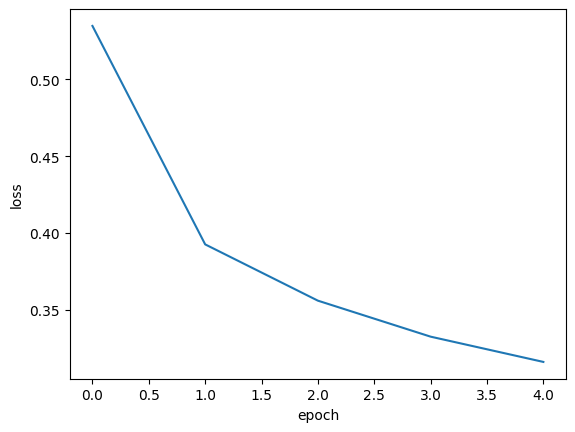

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

이번엔 정확도를 출력해 보겠음.

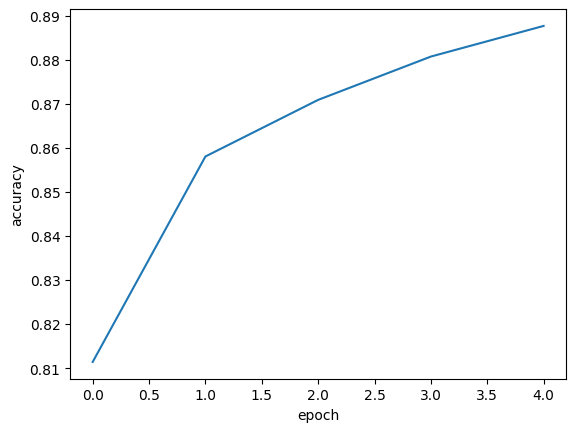

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크마다 손실이 감소하고 정확도가 향상하는군요. 에포크를 늘려서 더 훈련해 봐야 하지 않나?  
에포크 횟수를 20으로 늘려서 모델을 훈련하고 손실 그래프를 그려보겠음.

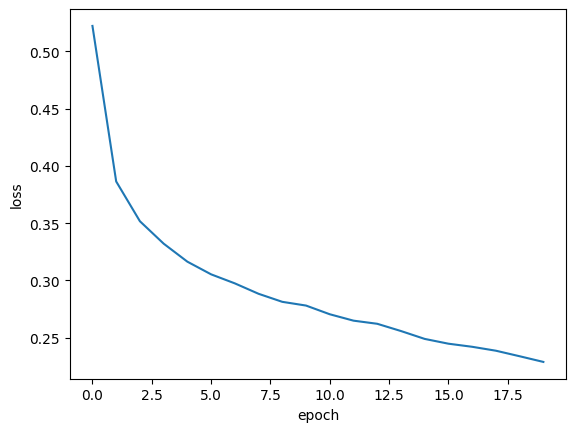

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

예상대로 손실이 잘 감소합니다. 이전보다 더 나은 모델을 훈련한 것일까요? 이전에 배웠던 것중에 놓친 것이 있지 않나요?

### 검증 손실
확률적 경사 하강법을 사용했을 때 과대/과소 적합과 에포크 사이의 관계를 알아봤음.  
인공 신경망은 모두 일종의 경사하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됩니다. 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요합니다. 이번 장에서는 손실을 사용하여 과대/과소적합을 다루겠습니다. 

##### 여기서 잠깐! 손실을 사용하는 것과 정확도를 사용하는 것은 어떤 차이가 있나요?
인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수. 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있습니다. 따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫습니다. 

에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달할 수 있습니다. 다음처럼 validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달합니다.

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

변환된 history.history 딕셔너리에 어떤 값이 들어 있는지 키를 확인해 보죠.

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


검증 세트에 대한 손실을 'val_loss'에 들어 있고 정확도는 'val_accuracy'에 들어 있겠네요. 과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려서 비교해보겠습니다.

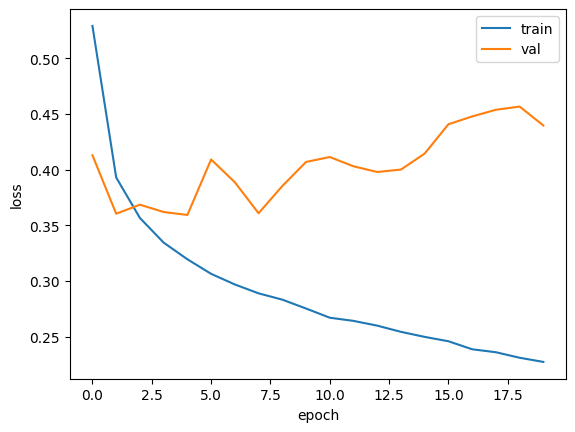

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승하기 시작함. 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어짐. 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것입니다.  
과대적합을 막기위해 3장에서 배웠던 규제 방식 대신에 신경망에 특화된 규제 방법을 다음 섹션에서 다루어 보겠습니다. 당장은 옵티마이저 하이퍼 파라미터를 조정하여 과대적합을 완화시킬 수 있는지 알아보겠습니다. 여기서는 Adam을 사용할 예정. Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있습니다.

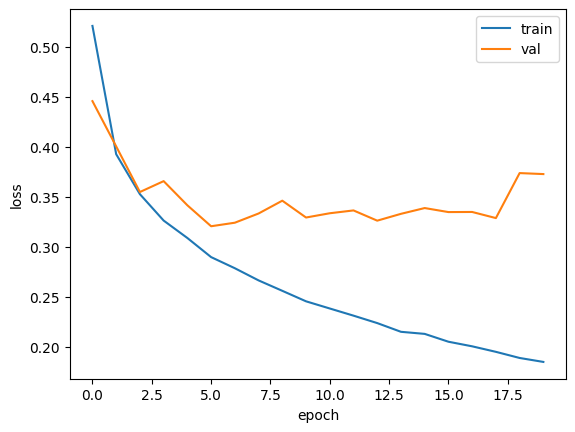

In [14]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 훨씬 줄어들음. 이는 Adam 옵티마이저가 이 데이터셋에 잘 맞는다는 것을 보여줌.

### 드롭아웃
__드롭아웃__ 은 딥러닝의 아버지로 불리는 제프리 힌턴이 소개했음. 이 방식은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (즉 뉴런의 출력을 0으로 만들어) 과대적합을 막습니다.  
뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 또 다른 하이퍼 파라미터입니다.  
드롭아웃이 왜 과대적합을 막을까요? 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함. 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것입니다.  
케라스에서는 드롭아웃을 keras.layers 패키지 아래에 Dropout 클래스로 제공합니다. 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 것. 드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없습니다. 여기에서는 30% 정도를 드롭아웃 시킴. 만들어진 모델의 summary() 메서드를 사용하여 드롭아웃 층이 잘 추가되었는지 확인.

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


출력 결과에서 볼 수 있듯이 은닉층 뒤에 추가된 드롭아웃 층 (Dropout)은 훈련되는 모델 파라미터가 없습니다. 또한 입력과 출력의 크기가 같습니다.  
일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸진 않습니다. 물론 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 합니다. 훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있음. 똑똑하게도 텐서플로와 케라스는 모델을 평가와 예측을 사용할 때는 자동으로 드롭아웃을 적용하지 않음.

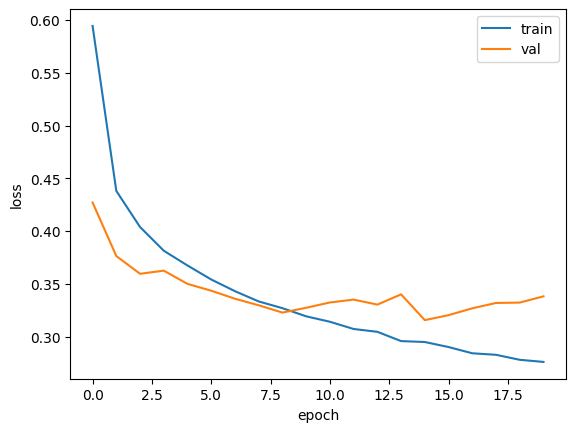

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 확실히 줄어들었음. 열 번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느정도 유지되고 있음.  
이 모델은 20번의 에포크 동안 훈련을 했기 때문에 결국 다소 과대적합 되어 있음. 그렇다면 과대적합 되지 않은 모델을 얻기 위해 에포크 횟수를 10으로 하고 다시 훈련.

### 모델 저장과 복원
에포크 횟수를 10으로 다시 지정하고 모델을 훈련하겠습니다. 나중에 한빛 마켓의 패션 럭키백 런칭에 사용하려면 이 모델을 저장해야 합니다.

In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공합니다.  
기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장합니다.

In [19]:
model.save_weights('model-weights.h5')

또한 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공합니다. 기본적으로 이 메서드는 텐서플로의 SaveModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장합니다.

In [20]:
model.save('model-whole.h5')

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


두 파일이 잘 만들어졌는지 확인.

In [21]:
!ls -al *.h5

-rw-r--r--  1 seunghalee  staff  333320 Jul 19 15:43 model-weights.h5
-rw-r--r--  1 seunghalee  staff  982480 Jul 19 15:45 model-whole.h5


첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용합니다.  
두 번째는 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용합니다.

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재했습니다. 이때 사용하는 메서드는 save_weights()와 쌍을 이루는 load_weights()메서드 입니다.

##### 여기서 잠깐! 모델 파라미터를 적재하는 조건이 있나요?
load_weight() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 합니다.

이 모델의 검증 정확도를 확인해 보겠습니다. 케라스에서 예측을 수행하는 predice() 메서드는 사이킷런과 달리 샘플마다 10개의 클래서에 대한 확률을 반환합니다. 패션 MNIST 데이터셋이 다중 분류 문제이기 때문. 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기 때문에 predict() 메서드는 (12000, 10) 크기의 배열을 반환합니다.  
따라서 조금 번거롭지만 10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도를 계산해 보겠습니다.

##### 여기서 잠깐! evaluate() 메서드를 왜 사용하지 않나요?
모델 파라미터를 읽은 후 evaluate() 메서드를 사용하여 정확도를 출력할 수 있습니다. 하지만 evaluate() 메서드는 손실을 계산하기 위해 반드시 먼저 compile() 메서드를 실행해야 합니다. 여기에서는 새로운 데이터에 대해 정확도만 계산하면 되는 상황이라고 가정합니다.

In [23]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 287us/step
0.876


모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용했음. 이 함수는 배열에서 가장 큰 값의 인덱스를 반환합니다.  
argmax() 함수의 axis=-1은 배열의 마지막 차원을 따라 최댓값을 고릅니다. 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됩니다.  
axis=1이면 열을 따라 각 행의 최댓값의 인덱스를 선택하고, axis=0이면 행을 따라 각 열의 최댓값의 인덱스를 선택합니다.  
그다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교. 두 배열에서 각 위치의 값이 같으면 1이 되고 다르면 0이 됩니다.  
이를 평균하면 정확도가 됩니다.  
이번에는 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해 보겠습니다. 모델이 저장된 파일을 읽을 때는 케라스가 제공하는 load_model() 함수를 사용.

In [24]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 341us/step - loss: 0.3342 - accuracy: 0.8760


[0.33423277735710144, 0.8759999871253967]

같은 모델을 저장하고 다시 불러들였기 때문에 위와 동일한 정확도를 얻었습니다. 그런데 이 과정을 돌이켜 보면 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인했습니다.

### 콜백
__콜백__ 은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들입니다. fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용합니다. 여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장합니다. save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있습니다.

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model_fn() 함수로 모델을 만들고 compile() 메서드를 호출하는 것은 이전과 동일.  
ModelCheckpoint 클래스의 객체 checkpoint_cb를 만든 후 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달합니다.  
모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모델이 저장됩니다.

In [26]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 366us/step - loss: 0.3158 - accuracy: 0.8864


[0.3158002495765686, 0.8864166736602783]

ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었습니다. 하지만 여전히 20번의 에포크 동안 훈련을 하는군요. 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없습니다. 이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있음.  
이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 __조기 종료__ 라고 부르며, 딥러닝 분야에서 널리 사용함.  
조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수 있음.  
케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공합니다. 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정합니다. 또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌립니다.

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stoppint_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stoppint_cb])

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


fit() 메서드의 callbacks 매개변수에 2개의 콜백을 리스트로 전달한 것을 눈여겨보세요.

In [28]:
print(early_stoppint_cb.stopped_epoch)

16


patience를 2로 지정했으므로 최상의 모델은 15번째 에포크.

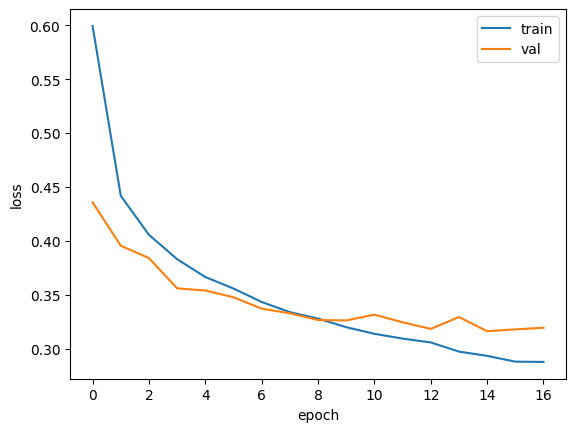

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

열 다섯 번째 에포크에서 가장 낮은 손실을 기록했고, 열 일곱 번째 에포크에서 훈련이 중지되었습니다. 조기 종료 기법을 사용하면 안심하고 에포크 횟수를 크게 지정해도 괜찮습니다. 컴퓨터 자원과 시간을 아낄 수 있고 ModelCheckpoint 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해 주므로 편리합니다.

In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 340us/step - loss: 0.3162 - accuracy: 0.8853


[0.3162270188331604, 0.8853333592414856]